<a href="https://colab.research.google.com/github/dhilligo/PHYS633S22/blob/main/Hilligoss_Dylan_18_Convection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">18-Convection</font>

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [2]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

import matplotlib.colors as cl
from matplotlib.collections import LineCollection

## 1. To execute: Opening Mesa structure models

We have been using models from the MESA structure and evolution code already. Please take some time to read the paper describing the code: http://iopscience.iop.org/article/10.1088/0067-0049/192/1/3/pdf. (Note, make sure to download it while on campus for free access).

You can open the file with text edit, and you can see that it contains a whole set of columns with the values of parameters at different depths in the star.

For this notebook, I provide you with two models:
1. present-day model of the Sun (18-Sun-profile.data)
2. model of a star with an initial mass of 10$M_\odot$, as a similar evolution stage (18-M10-profile.data)

The function below reads in a MESA model into a numpy "rec array".  

In [3]:
def read_model(file):

    return np.genfromtxt(file, skip_header=5, names=True)

Here's a command that will show you the names of all the columns in the file. You can access a column by doing: data['column name'].

In [4]:
file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data'

data = read_model(file_url)

print(data.dtype.names)

('zone', 'logT', 'logRho', 'logP', 'logR', 'luminosity', 'eps_grav', 'signed_log_eps_grav', 'net_energy', 'signed_log_power', 'velocity', 'entropy', 'mixing_type', 'csound', 'v_div_csound', 'eta', 'mu', 'logdq', 'dq_ratio', 'q', 'log_q', 'radius', 'rmid', 'temperature', 'tau', 'logtau', 'pressure', 'pgas_div_ptotal', 'logPgas', 'grada', 'free_e', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'abar', 'ye', 'log_opacity', 'eps_nuc', 'd_lnepsnuc_dlnd', 'd_lnepsnuc_dlnT', 'non_nuc_neu', 'mlt_mixing_length', 'mlt_mixing_type', 'gradT_sub_grada', 'gradT_div_grada', 'log_mlt_Gamma', 'log_D_mix', 'log_conv_vel', 'conv_vel_div_csound', 'log_mlt_D_mix', 'pressure_scale_height', 'gradT', 'gradr', 'mass', 'logxq', 'logxm', 'x', 'y', 'z', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24', 'pp', 'cno', 'tri_alfa', 'burn_c', 'burn_n', 'burn_o', 'burn_ne', 'burn_na', 'burn_mg', 'burn_si', 'burn_s', 'burn_ar', 'burn_ca', 'burn_ti', 'burn_cr', 'burn_fe', 'c12_

## 2. To execute: I will show you how to use a quite nifty function that creates colored lines

In [5]:
def data_lines(x, y, z, min_col, max_col, cmap):
    points = np.array([x, y]).T.reshape(-1, 1, 2)

    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=plt.get_cmap(cmap),
                    norm=plt.Normalize(min_col, max_col))
    lc.set_array(z)
    lc.set_linewidth(2)
    
    return lc

Here I create a color map that is called cm_plusmin, by defining 256 RGB values.

This is taken from an excellent compilation of B&W and color-blind friendly color maps: https://personal.sron.nl/~pault/

In [6]:
cols = []
for x in np.linspace(0,1, 256):
    rcol = 0.237 - 2.13*x + 26.92*x**2 - 65.5*x**3 + 63.5*x**4 - 22.36*x**5
    gcol = ((0.572 + 1.524*x - 1.811*x**2)/(1 - 0.291*x + 0.1574*x**2))**2
    bcol = 1/(1.579 - 4.03*x + 12.92*x**2 - 31.4*x**3 + 48.6*x**4 - 23.36*x**5)
    cols.append((rcol, gcol, bcol))

cm_plusmin = cl.LinearSegmentedColormap.from_list("PaulT_plusmin", cols)

## 3. Let's first look at the opacity inside of stars. 

As we discussed in class, the convection is more likely when the $\nabla_\mathrm{rad}$ ($=\nabla_\mathrm{med}$) is large. 

As the opacity is part of the equation for $\nabla_\mathrm{rad}$, it would be a good idea to see how it varies inside of stars. 

We will look at a graph of $\log(T)$ versus $\log(\rho)$, which will also be very useful to visualize the radial profile of stars of various masses. 

### a. In class: we will do the Sun.

### b. At home: add a colored line for the $10 M_\odot$ model. 

> **TODO**: Add a colored line in the graph for the $10 M_\odot$ model. Dont' forget to label your axes.

Text(0.5, 1.0, 'Studying Change in Opacity inside Solar and $10M_{\\odot}$ Model Stars')

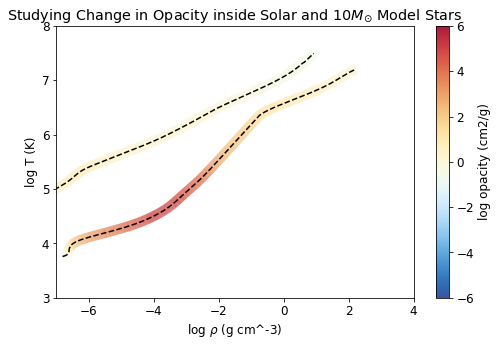

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_xlim(-7,4)
ax.set_ylim(3,8)

# Define the min and max values for the color range
min_col = -6
max_col = 6

###########################
###########################
# In class


# Create a line collection for the solar model
file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data'

data = read_model(file_url)

lc1 = data_lines(data['logRho'], data['logT'], data['log_opacity'], min_col, max_col, cmap=cm_plusmin)
lc1.set_linewidth(10)
cax=ax.add_collection(lc1)

# Add dashed lines to show the data better
ax.plot(data['logRho'],data['logT'], c='k', ls='--')


# Add a color bar and a label
cbar = plt.colorbar(cax)
cbar.ax.set_ylabel('log opacity (cm2/g)')


###########################
###########################
# At home: add the colored line for the M10 model.

file_url1 = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data'

# Create a line collection for the 10Msun model

data = read_model(file_url1)

lc2 = data_lines(data['logRho'], data['logT'], data['log_opacity'], min_col, max_col, cmap=cm_plusmin)
lc2.set_linewidth(10)
cax1 = ax.add_collection(lc2)

ax.plot(data['logRho'],data['logT'],c='k', ls='--')
ax.set_xlabel(r'log $\rho$ (g cm^-3)')
ax.set_ylabel('log T (K)')
ax.set_title(r'Studying Change in Opacity inside Solar and $10M_{\odot}$ Model Stars')


> **TODO**: Interpretatation:
1. In the graph, which end of the curves represent the stellar surface?

***ANSWER***: The left end of the curves represent the stellar surface. This is because at this point, the temperature and density are at its lowest point, implying that this is the location of the stellar surface (low density and low temperature). 

2. How does the opacity compare with Fig. 3 of Paxton et al. 2011?

***ANSWER***: The opacity matches up quite well with the opacity found in Figure 3 of Paxton et al., (2011). Both my plot and the plot found in Paxton et al., (2011) have an opacity ranging from -6.0-6.0 in a log scale. Both plots move from low opacity in the stellar interior (near the core) to high opacity near the surface as is evident by the obvious increase in opacity as temperature and density decrease.

3. Comment on the change in opacity as a function of position inside of the star for each model. This will be useful for your intrepretation of #4

***ANSWER***: For the solar model, there is an obvious change in opacity as a function of position. In and around the core, the opacity is much lower since the temperature and density are high. This suggests that in this region, radiation dominates energy transport, not convection. As one moves further away from the core towards the surface, the opacity significantly increases. This is because as the temperature and density decrease, convective processes kick in. This essentially "stirs up the pot" making the material more opaque. At the same time, with a decrease in temperature, atoms begin to recombine. This increases their cross section thereby increasing the opacity.

For the $10M_{\odot}$ stellar model, there is no substaintial change in opacity as a function of distance. This is due to the fact that radiation dominates energy transport all the way out to the surface. There is little to no convection throughout the star which therefore does not "stir up the pot." Also, things remained ionized as the temperature and density fall off slower than in the solar model case.

## 4. Convections in main sequence stars.

In the models, the values of $\nabla_\mathrm{real}$, $\nabla_\mathrm{rad}$ ($=\nabla_\mathrm{medium}$), and $\nabla_\mathrm{ad}$ are in columns named 'gradT', 'gradr', and 'grada', respectively. 

Note: the radius is in units of solar radii for all models. 


### a. In class: Let's see how these look in a solar model.

### b. At home: Do the same for the 10$M_\odot$ model.

> **TODO** Do the same for the 10$M_\odot$ model in the right-hand plot. Don't forget to label your axes and add legend items for each curves

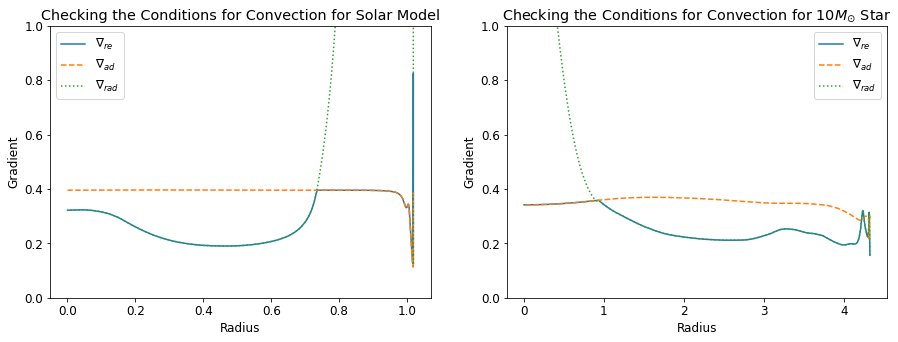

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'Times New Roman'})



###########################
###########################
# In class
file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data'

data = read_model(file_url)

ax[0].plot(10**data['logR'], data['gradT'], label=r'$\nabla_{re}$')
ax[0].plot(10**data['logR'], data['grada'], ls='--', label=r'$\nabla_{ad}$')
ax[0].plot(10**data['logR'], data['gradr'], ls='dotted', label=r'$\nabla_{rad}$')

ax[0].set_ylim(0,1)
ax[0].set_xlabel('Radius')
ax[0].set_ylabel('Gradient')
ax[0].set_title('Checking the Conditions for Convection for Solar Model')
ax[0].legend(loc=0)



###########################
###########################
# At home
file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data'

data = read_model(file_url)

ax[1].plot(10**data['logR'], data['gradT'], label=r'$\nabla_{re}$')
ax[1].plot(10**data['logR'], data['grada'], ls='--', label=r'$\nabla_{ad}$')
ax[1].plot(10**data['logR'], data['gradr'], ls='dotted', label=r'$\nabla_{rad}$')

ax[1].set_ylim(0,1)
ax[1].set_xlabel('Radius')
ax[1].set_ylabel('Gradient')
ax[1].set_title(r'Checking the Conditions for Convection for $10M_{\odot}$ Star')
ax[1].legend(loc=0)

> **TODO**: <font color="red">Interpretation:</font> 
>
>1. For each star, where is the condition for instability fulfilled?

***ANSWER***: For each star the condition for instability is met when $\nabla_{rad}>\nabla_{ad}$. In the solar model, this occurs at around $0.75R_{\star}$. For the $10M_{\odot}$ model, this occurs around $1R_{\star}$. 

>2. For each star, explain the behavior of the real temperature gradient.
***ANSWER***: For the solar model star, the real temperature gradient stays below the adiabatic gradient curve until the onset of convection. Before the onset of convection, the real temperature gradient exactly follows that of the radiative gradient since that is the primary mode of energy transport. After convection starts, the radiative gradient "skyrockets" since the enclosed luminosity also increases rapidly at this point. Now, the real temperature gradient mimics the adiabatic gradient curve suggesting that convection dominates energy transport. 
A similar situation is true for the $10M_{\odot}$ model except now, the majority of the star has energy transport dominated by radiation, not convection. The real temperature curve follows the adiabatic curve until convection no longer dominates. Then the real temperature curve mimics the radiative gradient curve since this is the dominate mode of energy transport. Since the enclosed luminosity dramatically changes at this transition point, so also will the real temperature gradient.

>3. There is a very famous graph in the Kippenhahn (22.7 in first edition, reproduced in the lecture slides). Based on this graph and the ones you just made, comment on the change in energy transport as a function of stellar mass.  
***ANSWER***: The amount of convection is dependent on the mass of the star.  For increasing mass, less convection will occur. This is because radiation takes over as the primary mode of energy transport due to the density and temperature remaining high enough to prevent the condition for instability (convection) to occur. For stars that are even higher than $10M_{\odot}$, no convection will occur. Lower mass stars can be fully convective if the conditions are met. So basically, the amount of convection decreases as the stellar mass increases.